In [30]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\hp\\Desktop\\DATA_Glac_project\Data-Glacier-Group-Project-Week-9\\bank-additional-full.csv",delimiter=';')


<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
C:\Users\hp\AppData\Local\Temp\ipykernel_13140\1694884251.py:6: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\\Users\\hp\\Desktop\\DATA_Glac_project\Data-Glacier-Group-Project-Week-9\\bank-additional-full.csv",delimiter=';')


In [2]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Identifying the Outliers

Method : Using IQR(Inter Quartile Range)

In [38]:
#Defining the first and third quartile to find the IQR for the neumeric columns .
#Defining the Lower bound and Upper bound using the formula.
#Retuens the outliers within each column.
def identify_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < LB) | (df[column_name] > UB)]
    return outliers, LB, UB

# selecting numeric columns and creating a dict to store the outliers 
numeric_columns = df.select_dtypes(include='number').columns
outliers_counts_iqr = {}




Total number of outliers in each column using IQR method:
age: 469
duration: 2963
campaign: 2406
pdays: 1515
previous: 5625
emp.var.rate: 0
cons.price.idx: 0
cons.conf.idx: 447
euribor3m: 0
nr.employed: 0


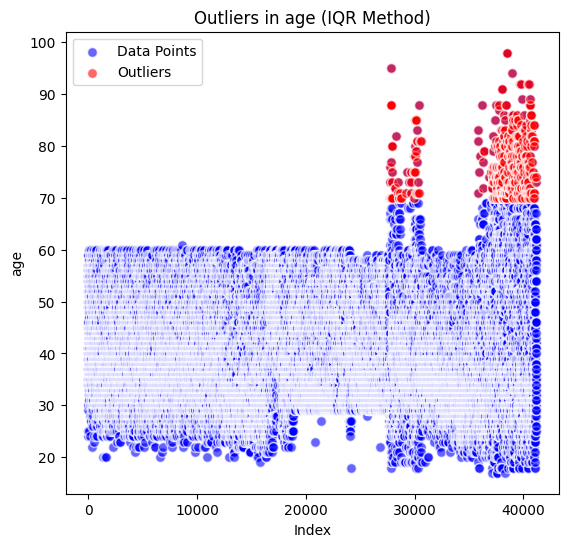

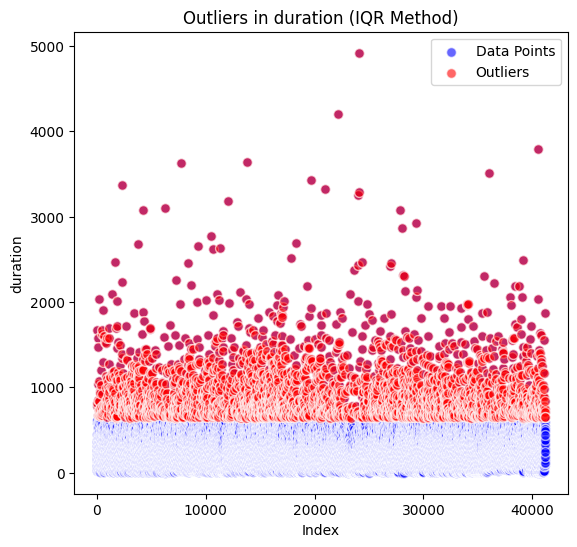

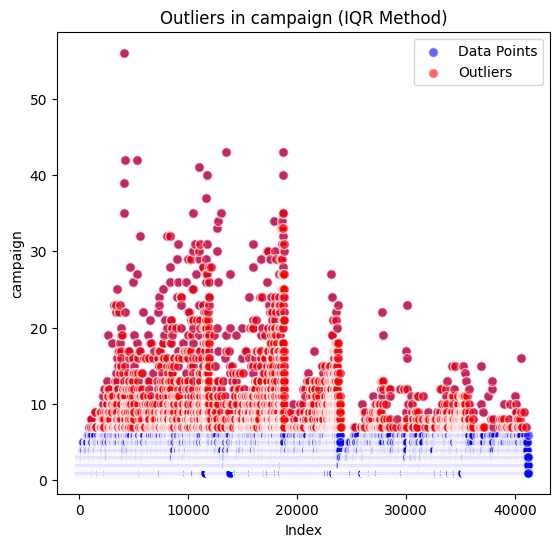

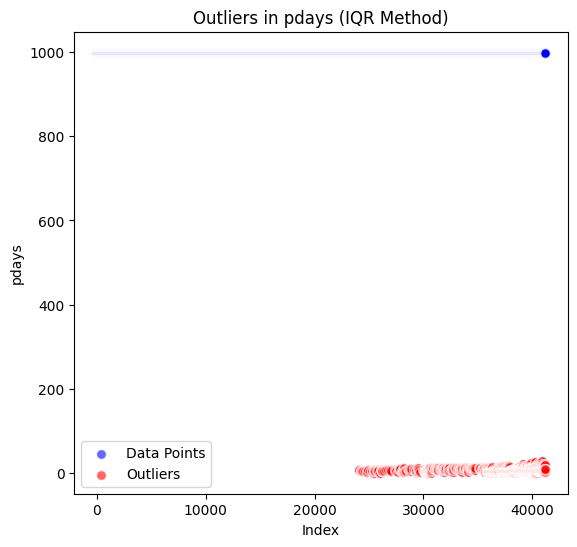

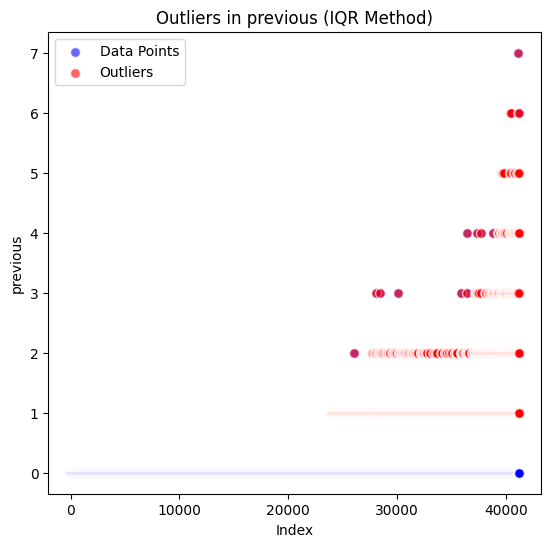

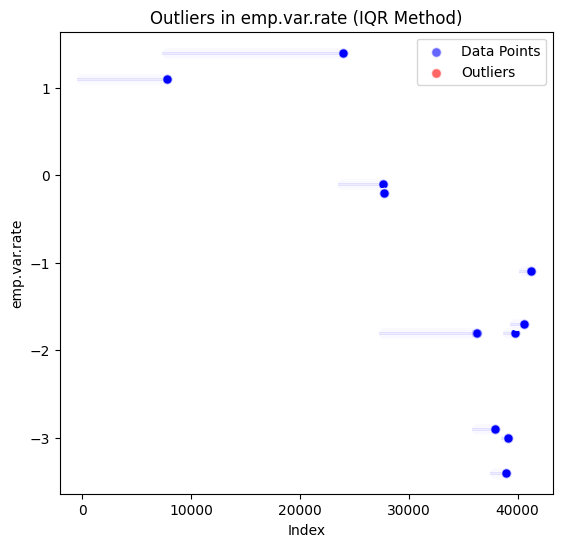

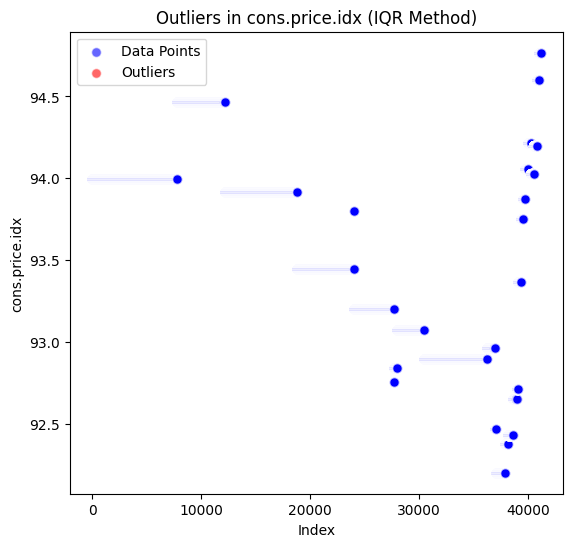

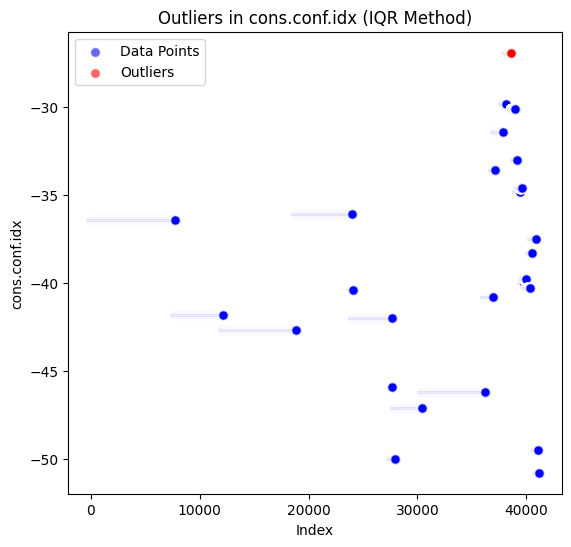

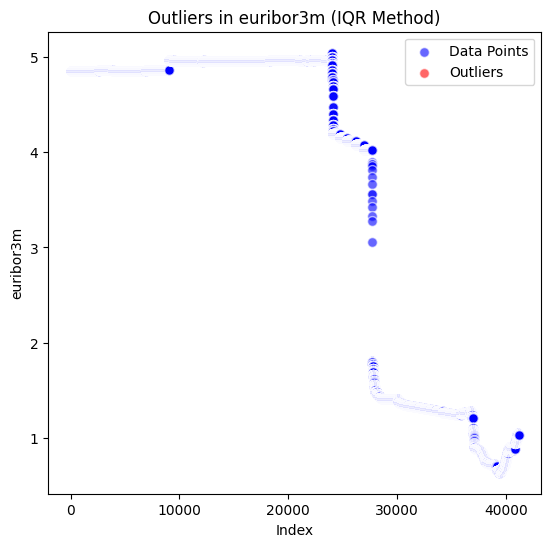

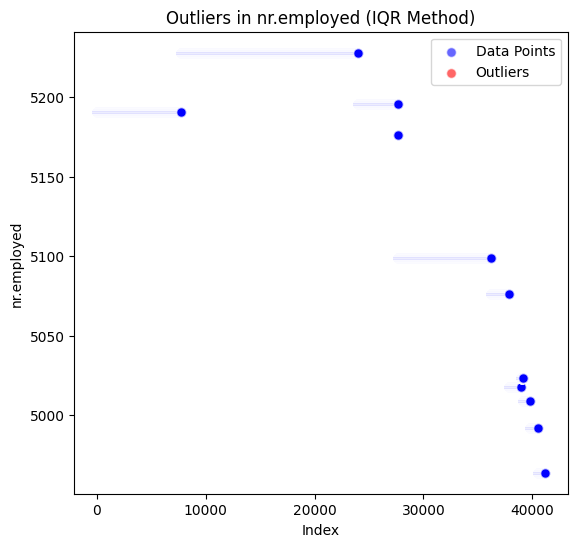

In [39]:
#Identifying the outliers using IQR function and counting outliers for each column
for column in numeric_columns:
    outliers_iqr, LB, UB = identify_outliers_iqr(df, column)
    outliers_counts_iqr[column] = len(outliers_iqr)
    
    # Plotting the outliers
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(df.index, df[column], color='blue', alpha=0.6, edgecolors='w', s=50, label='Data Points')
    plt.scatter(outliers_iqr.index, outliers_iqr[column], color='red', alpha=0.6, edgecolors='w', s=50, label='Outliers')
    plt.title(f'Outliers in {column} (IQR Method)')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()



# Print the total number of outliers in each column
print("\nTotal number of outliers in each column using IQR method:")
for column, count in outliers_counts_iqr.items():
    print(f"{column}: {count}")


Method 2 

Using Z-score

In [45]:
numeric_columns = df.select_dtypes(include='number').columns
threshold = 3
outliers_counts_Zscore = {}



Total number of outliers in each column:
age: 369
duration: 861
campaign: 869
pdays: 1515
previous: 1064
emp.var.rate: 0
cons.price.idx: 0
cons.conf.idx: 0
euribor3m: 0
nr.employed: 0


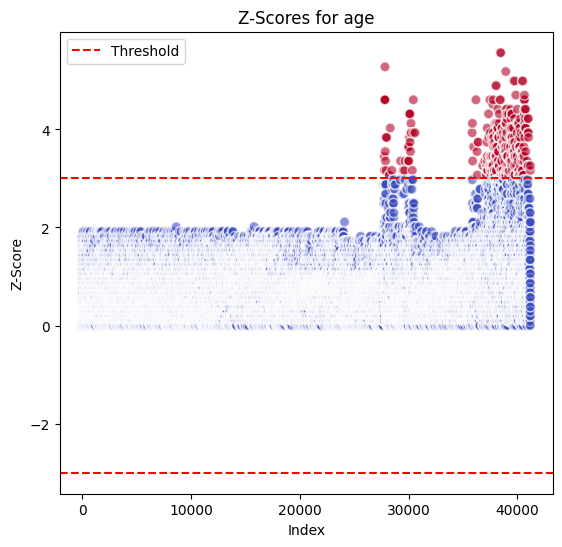

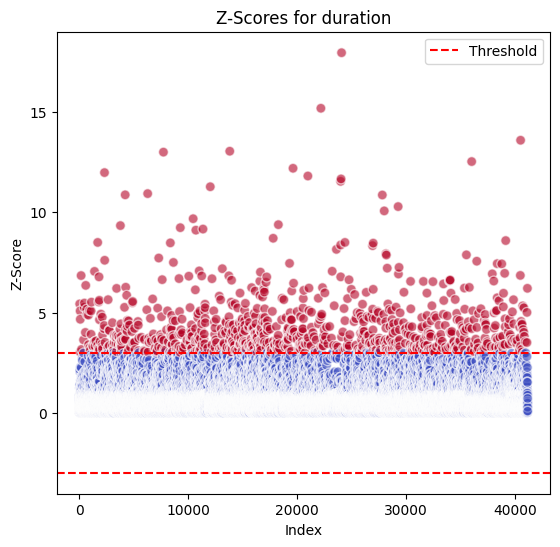

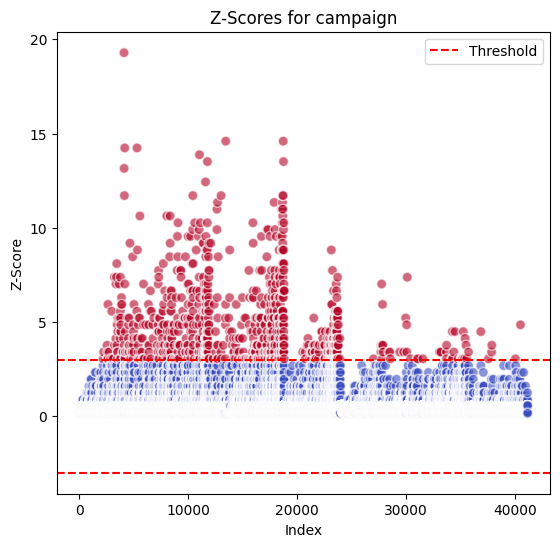

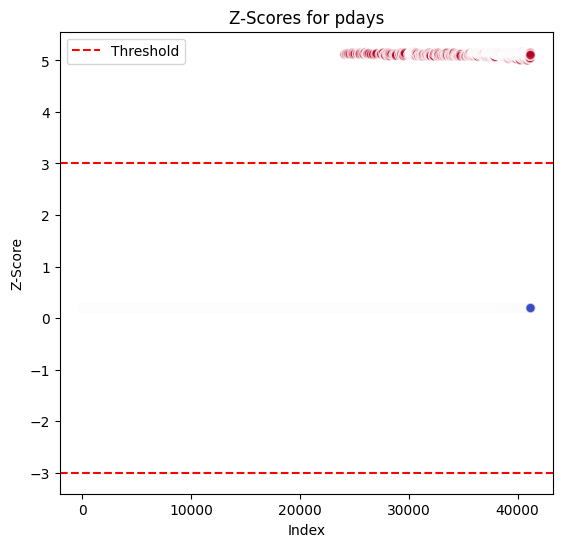

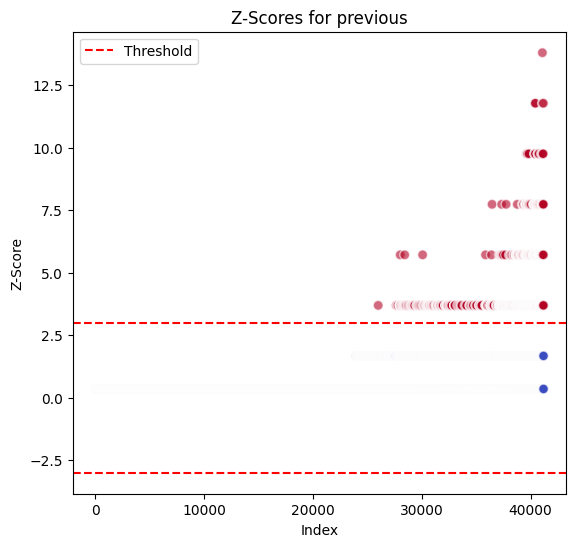

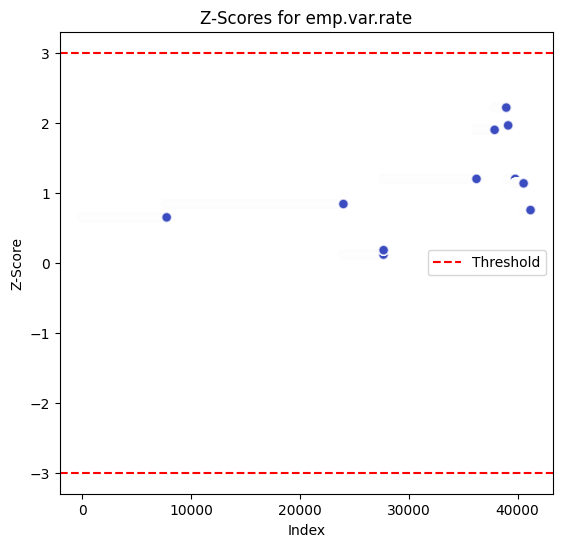

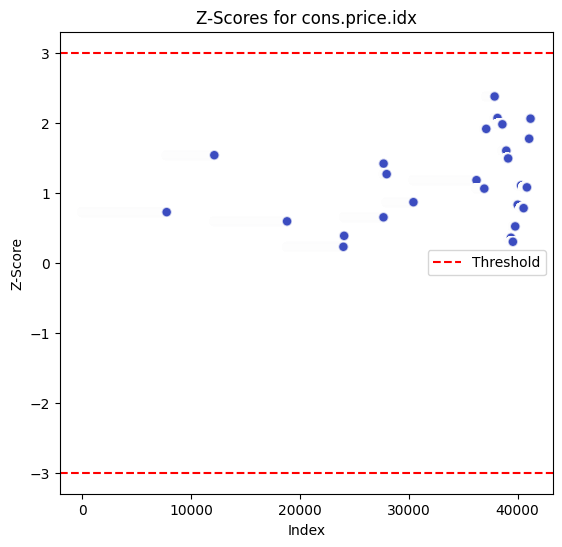

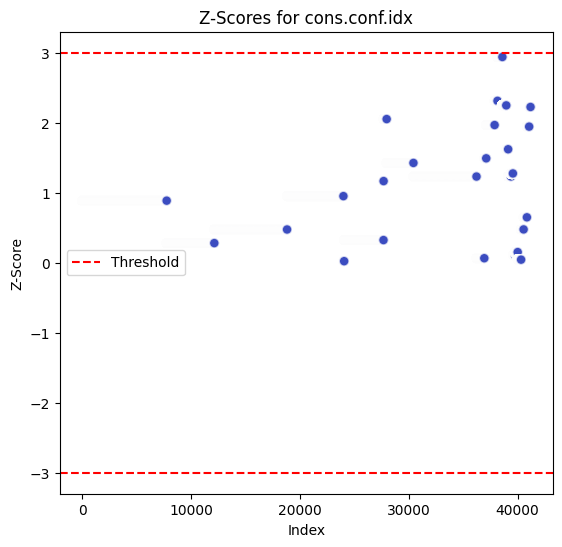

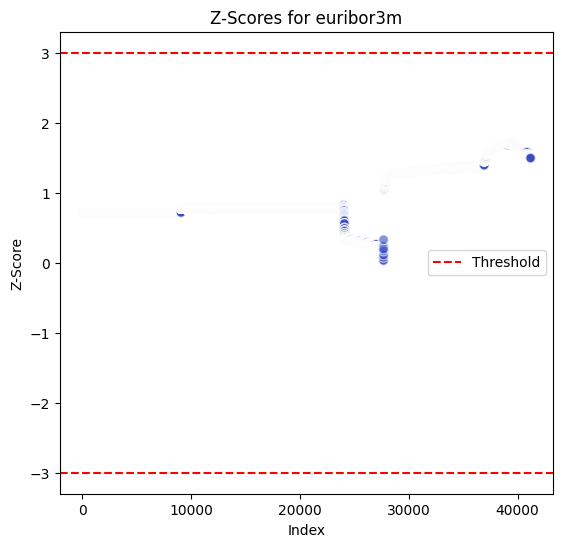

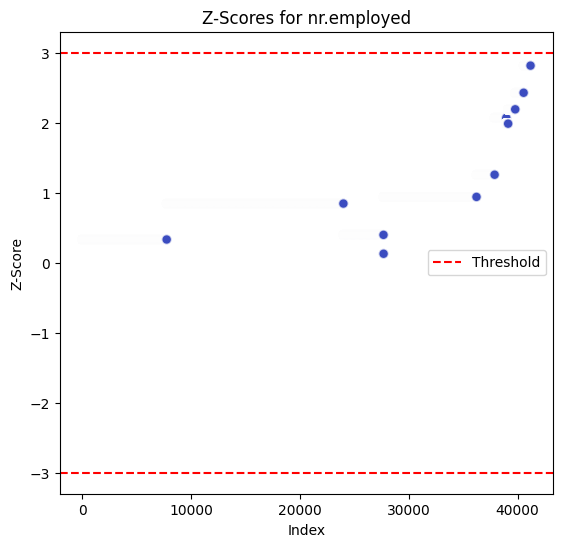

In [46]:
for column in numeric_columns:
    #Computing the Z_score for columns
    #Identifying the coulmn indices where z score is above threshold and counting outliers
    column_z_scores = np.abs(stats.zscore(df[column]))
    outlier_indices = np.where(column_z_scores > threshold)[0]
    outliers_counts_Zscore[column] = len(outlier_indices)
    
    # Plotting the outliers
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(df[column].index, column_z_scores, c=(column_z_scores > threshold), cmap='coolwarm', alpha=0.6, edgecolors='w', s=50)
    plt.title(f'Z-Scores for {column}')
    plt.xlabel('Index')
    plt.ylabel('Z-Score')
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    plt.axhline(y=-threshold, color='r', linestyle='--')
    plt.legend()

 

# Print the total number of outliers in each column
print("\nTotal number of outliers in each column:")
for column, count in outliers_counts_Zscore.items():
    print(f"{column}: {count}")